### Load and Preview the Dataset

In [2]:
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv("C:/project/fashion-recommender-system/data/processed/fashion-mnist_train.csv")
test_data = pd.read_csv("C:/project/fashion-recommender-system/data/processed/fashion-mnist_test.csv")

# Display the first few rows of the training dataset
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observation:
1. Each row corresponds to an image, with pixel intensity values and their corresponding class labels.
2. The first column represents class labels, while the remaining columns represent pixel values.


### 2. Basic Information

In [3]:
# Display information about the training dataset
train_data.info()

# Display summary statistics of the dataset
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


1. The dataset contains 60,000 samples with pixel values ranging from 0 to 255.
2. This step helps to identify data types and basic statistics, including the presence of missing values.


### Check for Missing Values

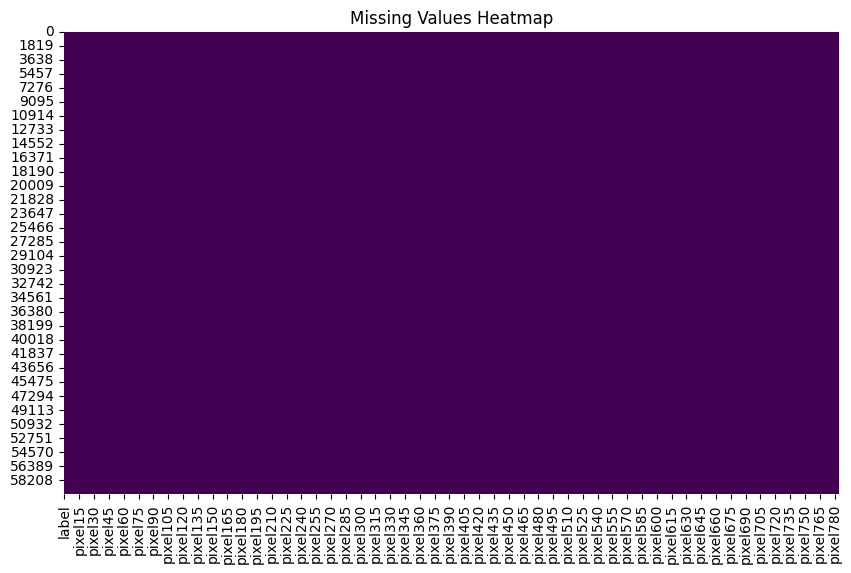

Missing Values:
Series([], dtype: int64)


In [4]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Visualize missing values with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Display missing values count
print(f'Missing Values:\n{missing_values[missing_values > 0]}')


There should be no missing values in the dataset. This step confirms the integrity of the data.


### Duplicate Rows Handling

In [5]:
# Check for duplicate rows
duplicate_rows = train_data.duplicated().sum()
print(f'Duplicate Rows: {duplicate_rows}')

# Remove duplicates if any
train_data_cleaned = train_data.drop_duplicates()

# Check the shape of the cleaned dataset
print(f'Shape after removing duplicates: {train_data_cleaned.shape}')


Duplicate Rows: 43
Shape after removing duplicates: (59957, 785)


Duplicates are often rare in image datasets, but verifying their absence ensures data quality.


### Class Distribution Analysis

C:\Users\om\AppData\Local\Temp\ipykernel_11944\341836539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data_cleaned.iloc[:, 0], palette="viridis")


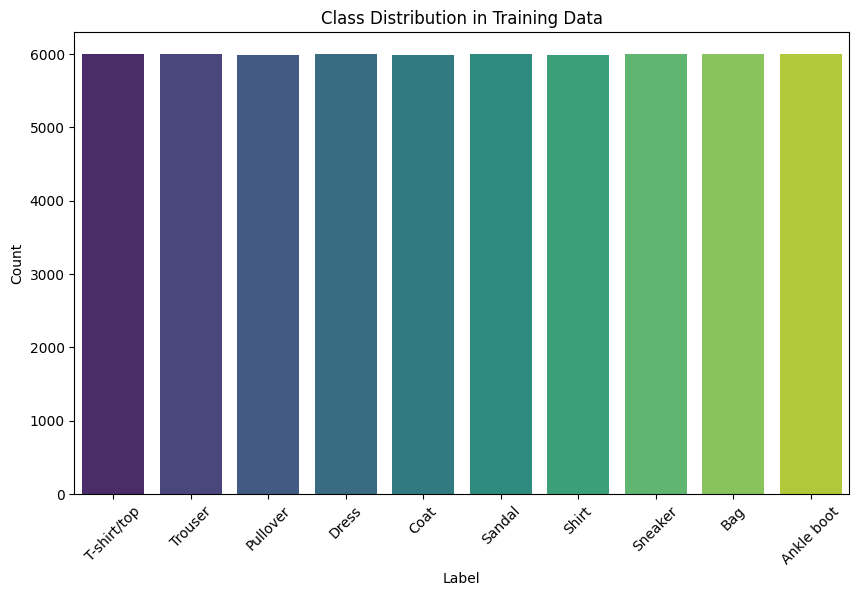

In [6]:
# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data_cleaned.iloc[:, 0], palette="viridis")
plt.title('Class Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 
    'Bag', 'Ankle boot'], rotation=45)
plt.show()


This chart reveals the balance of samples across different classes, helping identify any potential class imbalance.


###  Pixel Intensity Distribution


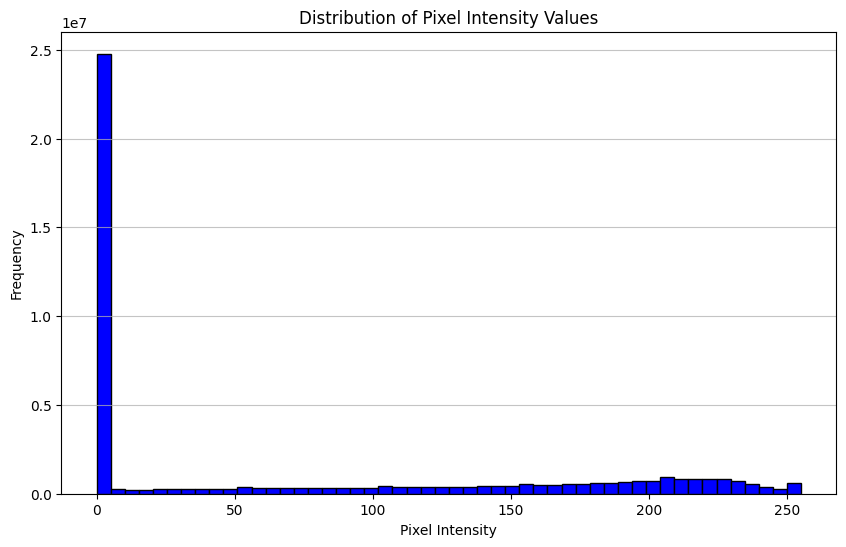

In [7]:
# Flatten the pixel values to a 1D array for visualization
pixel_values = train_data_cleaned.iloc[:, 1:].values.flatten()

# Plot a histogram of pixel intensity values
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Pixel Intensity Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


This histogram illustrates the range of pixel intensities, providing insights into the overall brightness and darkness of the images.


### Correlation Analysis of Pixel Values

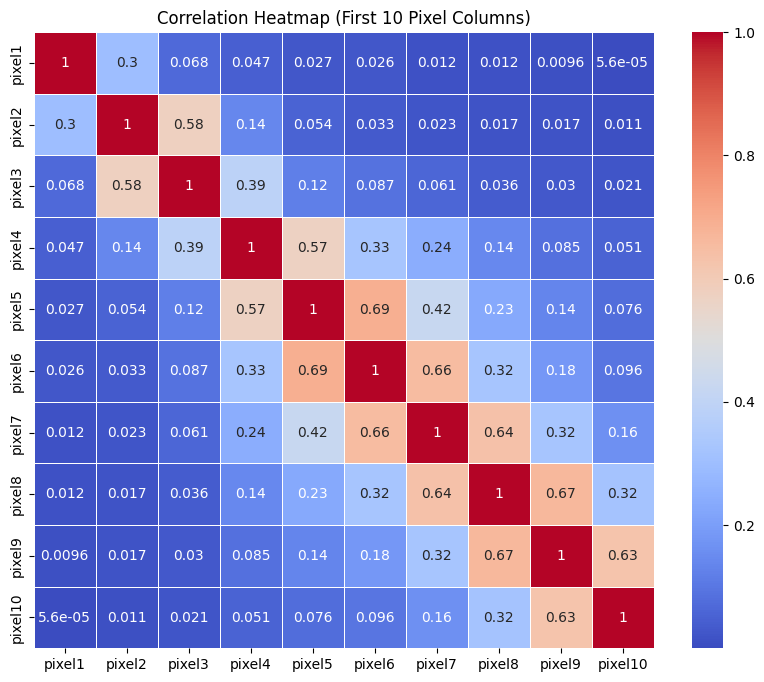

In [8]:
# Compute the correlation matrix for a subset of pixels (first 10 columns)
corr_matrix = train_data_cleaned.iloc[:, 1:11].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (First 10 Pixel Columns)")
plt.show()


High correlation among pixels suggests redundancy, indicating that certain pixel values may not provide unique information to the model.


### Outlier Detection

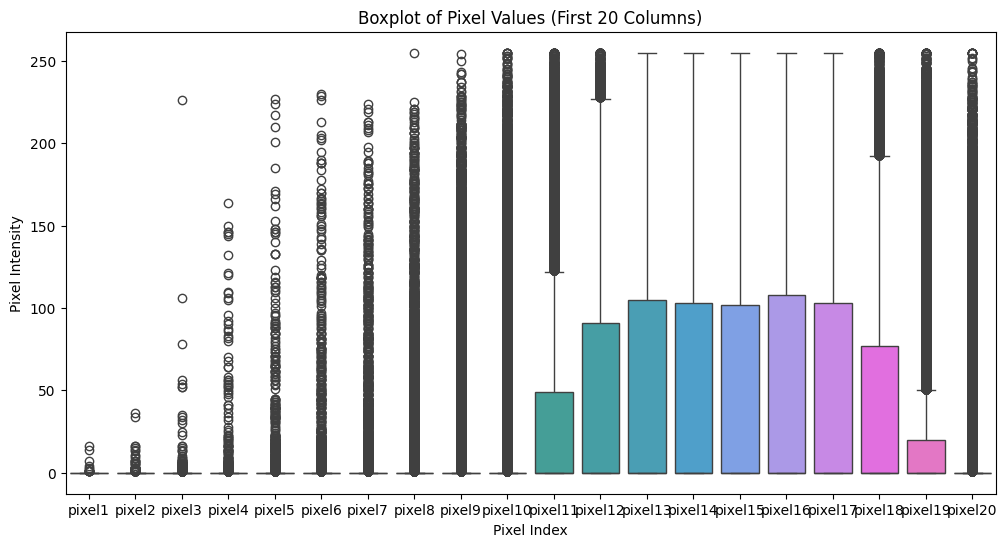

In [9]:
# Check for outliers in pixel values for a small subset
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data_cleaned.iloc[:, 1:21])  # First 20 pixel columns
plt.title('Boxplot of Pixel Values (First 20 Columns)')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Intensity')
plt.show()


 Outliers can indicate noise in the data, which may affect model performance. It's essential to identify and handle these appropriately.


### Image Visualization

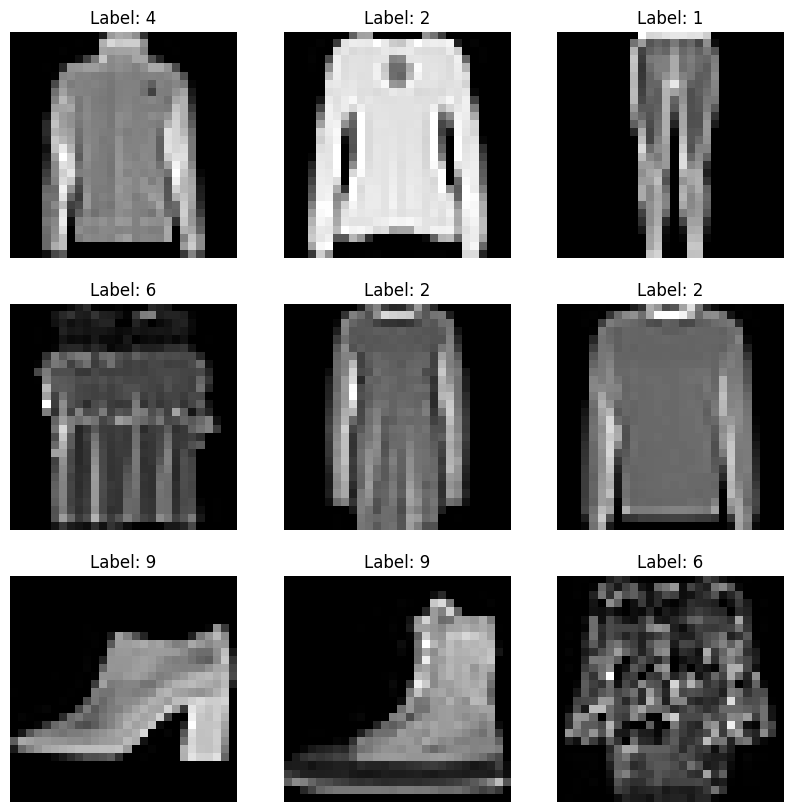

In [10]:
import random

# Display random images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(train_data_cleaned) - 1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_data_cleaned.iloc[idx, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {train_data_cleaned.iloc[idx, 0]}')
    plt.axis('off')
plt.show()


Randomly displaying images allows for a visual inspection of the data and verification of the correct labeling of images.


### Average Image Per Class

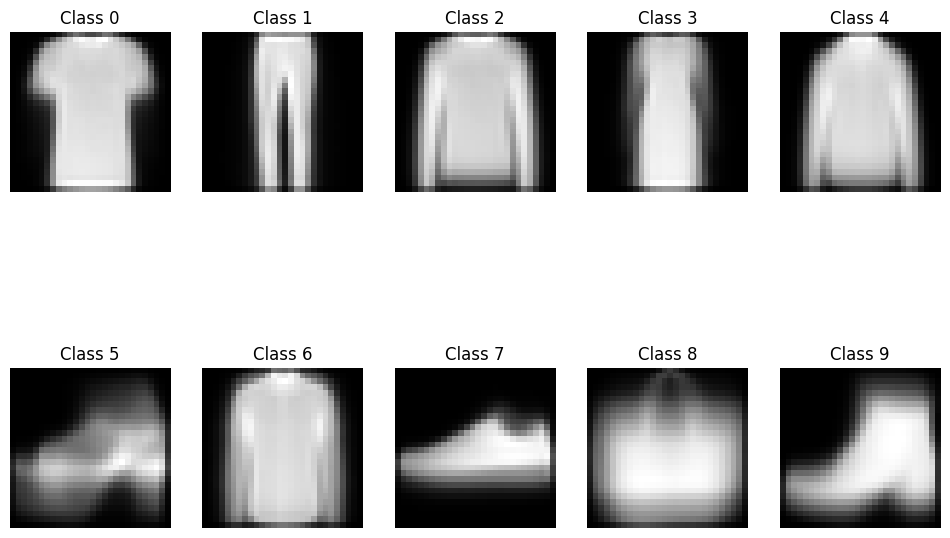

In [11]:
import numpy as np

# Compute the average image for each class
num_classes = 10
average_images = np.zeros((num_classes, 28, 28))

for label in range(num_classes):
    class_images = train_data_cleaned[train_data_cleaned.iloc[:, 0] == label].iloc[:, 1:].values
    average_images[label] = class_images.mean(axis=0).reshape(28, 28)

# Plot the average images for each class
plt.figure(figsize=(12, 8))
for label in range(num_classes):
    plt.subplot(2, 5, label + 1)
    plt.imshow(average_images[label], cmap='gray')
    plt.title(f'Class {label}')
    plt.axis('off')
plt.show()


The average image for each class gives a good representation of the common features across the samples, helping to understand the inherent characteristics of each class.


### PCA for Dimensionality Reduction

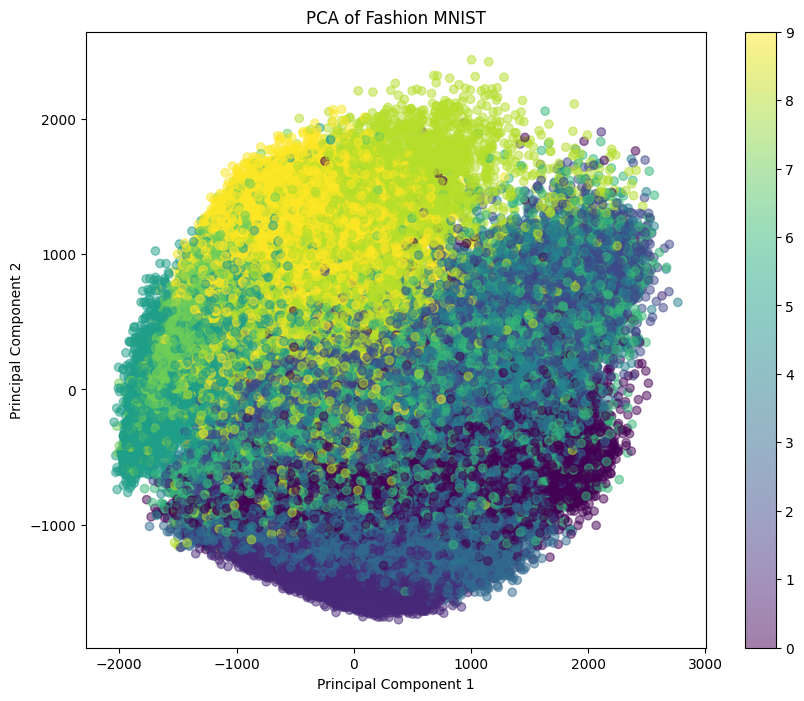

In [12]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_data_cleaned.iloc[:, 1:])

# Plot PCA reduced data
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=train_data_cleaned.iloc[:, 0], cmap='viridis', alpha=0.5)
plt.title('PCA of Fashion MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


PCA helps visualize the high-dimensional pixel data in a lower-dimensional space, allowing us to examine the separability of different classes

###  Class Relationships via Pair Plots

In [13]:
# Create pair plots for a sample of the dataset
#sample_data = train_data_cleaned.sample(n=10, random_state=1)  # Randomly sample 1000 records
#sns.pairplot(sample_data, hue='label', palette='Set2', diag_kind='kde')
#plt.suptitle('Pair Plots of Sample Data', y=1.02)
#plt.show()


Pair plots allow visual examination of relationships between different classes and features, revealing potential overlaps and distinctions.


### Check for Class Imbalance

label
5    6000
8    6000
0    5998
9    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: count, dtype: int64


C:\Users\om\AppData\Local\Temp\ipykernel_11944\556388270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


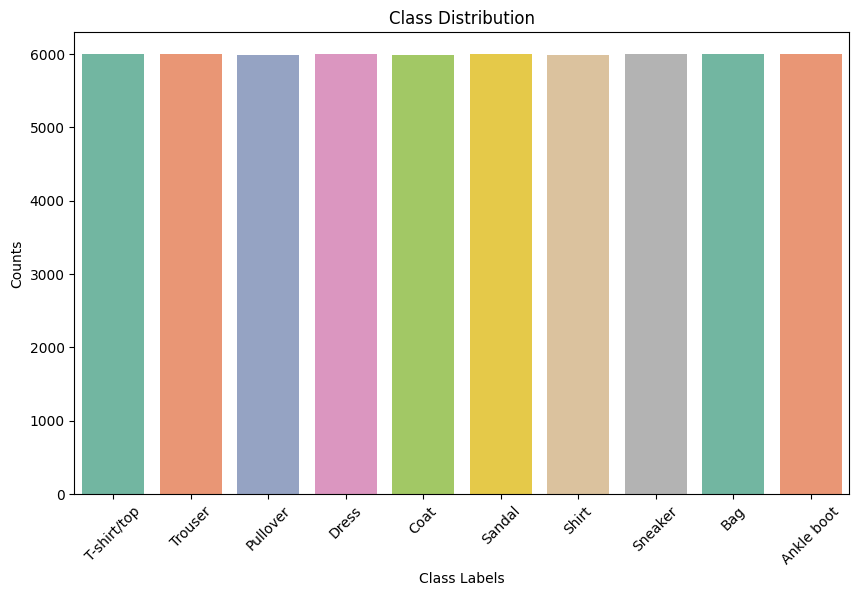

In [14]:
# Check for class imbalance
class_counts = train_data_cleaned.iloc[:, 0].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.xticks(ticks=range(10), labels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 
    'Bag', 'Ankle boot'], rotation=45)
plt.show()


Identifying class imbalance is crucial, as it can impact model training. If significant imbalance is found, techniques such as resampling or synthetic data generation might be needed.


### Advanced Visualization with t-SNE

In [16]:
"""from sklearn.manifold import TSNE

# Applying t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(train_data_cleaned.iloc[:, 1:])

# Plot t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=train_data_cleaned.iloc[:, 0], cmap='viridis', alpha=0.5)
plt.title('t-SNE of Fashion MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()"""


"from sklearn.manifold import TSNE\n\n# Applying t-SNE for 2D visualization\ntsne = TSNE(n_components=2, random_state=42, perplexity=30)\ntsne_results = tsne.fit_transform(train_data_cleaned.iloc[:, 1:])\n\n# Plot t-SNE results\nplt.figure(figsize=(10, 8))\nplt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=train_data_cleaned.iloc[:, 0], cmap='viridis', alpha=0.5)\nplt.title('t-SNE of Fashion MNIST')\nplt.xlabel('t-SNE Component 1')\nplt.ylabel('t-SNE Component 2')\nplt.colorbar()\nplt.show()"

t-SNE provides a non-linear method for dimensionality reduction, enabling us to visualize the high-dimensional data in a more meaningful way.


### Save EDA Results for Future Reference

In [17]:
# Save the cleaned data for future use
train_data_cleaned.to_csv("C:/project/fashion-recommender-system/data/processed/fashion-mnist_train_cleaned.csv", index=False)


Saving the cleaned dataset ensures that you can easily access and utilize it for future analysis or model training.
